In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
bbc = pd.read_csv('bbc.csv', usecols=['news','type'])
bbc.head()

,news,type
0,UK economy facing 'major risks'\n \n The UK ma...,business
1,Aids and climate top Davos agenda\n \n Climate...,business
2,Asian quake hits European shares\n \n Shares i...,business
3,India power shares jump on debut\n \n Shares i...,business
4,Lacroix label bought by US firm\n \n Luxury go...,business


In [3]:
from sklearn.model_selection import train_test_split
news_train, news_test, type_train, type_test = train_test_split(bbc['news'], bbc['type'], test_size=0.3, random_state=101)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [34]:
model = Pipeline([
    ('bow', CountVectorizer()),
    ('clssifier', LogisticRegression())
])

In [35]:
model.fit(news_train, type_train)

C:\Users\Sanjai msd\anaconda3\envs\py3.9\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('bow', CountVectorizer()),
                ('clssifier', LogisticRegression())])

In [36]:
pred = model.predict(news_test)

In [37]:
from sklearn.metrics import classification_report, accuracy_score

In [38]:
print(classification_report(type_test, pred))

               precision    recall  f1-score   support

     business       0.97      0.97      0.97       161
entertainment       0.94      0.96      0.95       114
     politics       0.97      0.93      0.95       139
        sport       0.97      0.99      0.98       146
         tech       0.96      0.97      0.97       108

     accuracy                           0.96       668
    macro avg       0.96      0.96      0.96       668
 weighted avg       0.96      0.96      0.96       668



In [39]:
print(accuracy_score(type_test, pred))

0.9640718562874252


(array([108.,   0., 161.,   0.,   0., 139.,   0., 114.,   0., 146.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

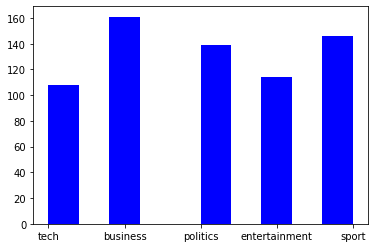

In [40]:
plt.hist(type_test, color='blue')

(array([109.,   0., 160.,   0.,   0., 133.,   0., 116.,   0., 150.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

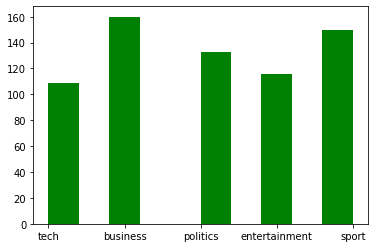

In [41]:
plt.hist(pred, color='green')